In [242]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [243]:
import numpy as np

In [245]:
d['start_date'] = pd.to_datetime(d['start_date'])

In [244]:
d = pd.read_csv('values_month_year.csv')
d.head()

,start_date,total_users
0,2019-01-01,24471
1,2019-02-01,23684
2,2019-03-01,30391
3,2019-04-01,27476
4,2019-05-01,25645


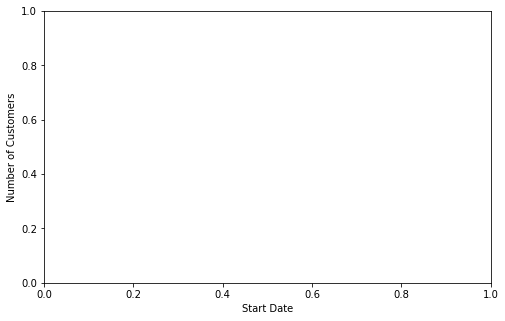

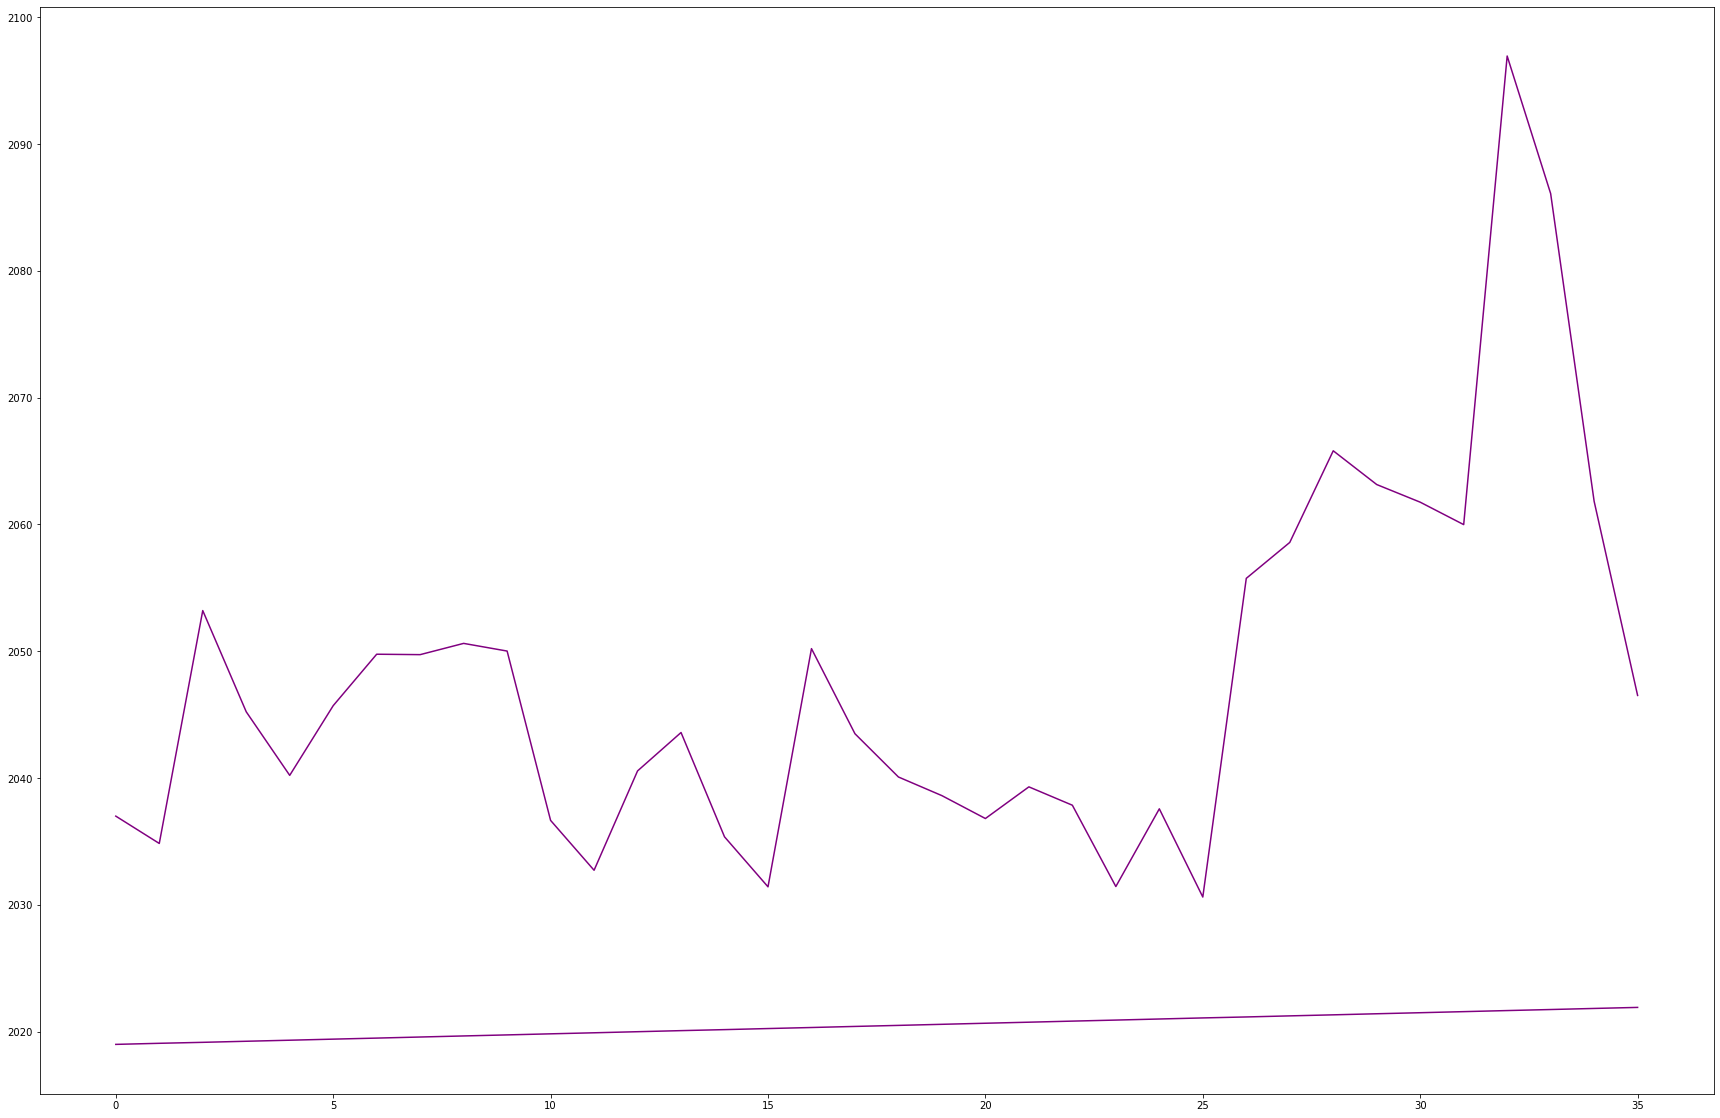

In [246]:
plt.xlabel('Start Date')
plt.ylabel('Number of Customers')
plt.figure(figsize=(30,20))
plt.plot(d, color = 'purple')

In [247]:
d.dtypes

start_date     datetime64[ns]
total_users             int64
dtype: object

In [248]:
d.index = pd.to_datetime(d['start_date'] ,format = '%Y-%m-%d')

In [249]:
del d['start_date']

In [ ]:
#d = d.sample(frac=0.1)

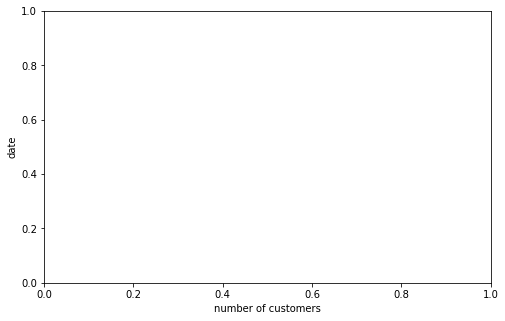

In [250]:
plt.xlabel('number of customers')
plt.ylabel('date')
plt.xticks(rotation = 0)
plt.rcParams["figure.figsize"] = (8,5)

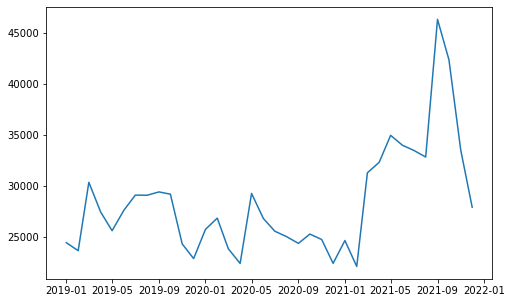

In [251]:
plt.plot(d.index, d['total_users'],)

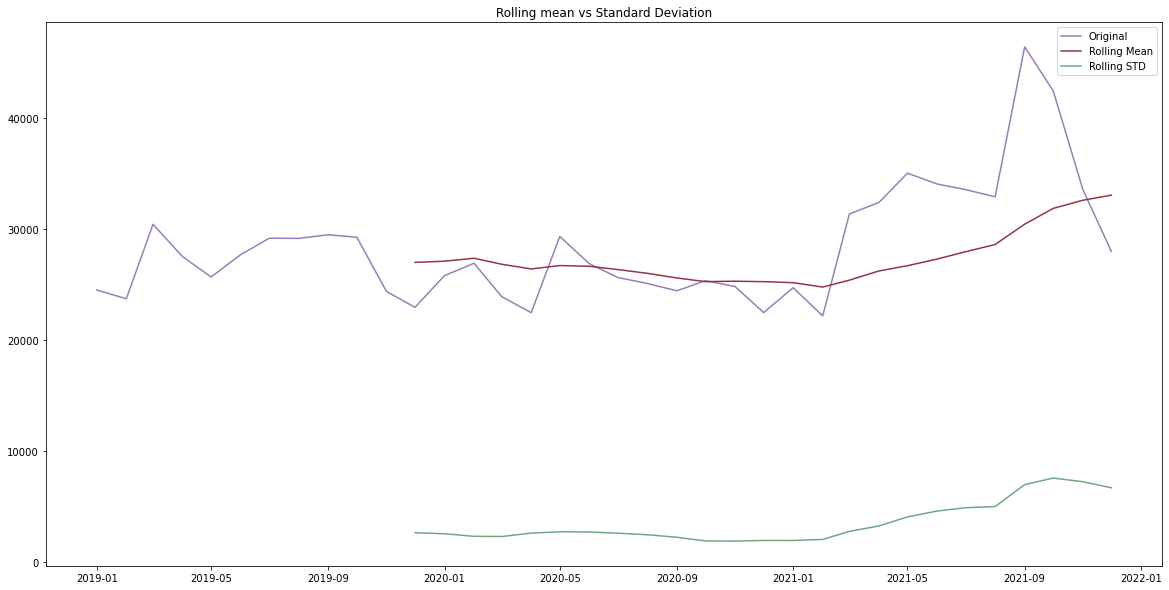

In [252]:
#dtermine if statioanry or not
rolling_mean = d.rolling(window = 12).mean()
rolling_std = d.rolling(window = 12).std()

plt.figure(figsize=(20,10))

plt.plot( d, color = '#997DB8', label = 'Original')
plt.plot( rolling_mean, color = '#92324B', label = 'Rolling Mean')
plt.plot( rolling_std, color = '#70A77E', label = 'Rolling STD')
plt.legend(loc = 'best')
plt.title('Rolling mean vs Standard Deviation')
plt.show()

In [253]:
result = adfuller(d['total_users'])

print('ADF Statistics: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical value:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key,value))

ADF Statistics: -2.4449231466628008
p-value: 0.12945638748215488
Critical value:
	1%: -3.6327426647230316
	5%: -2.9485102040816327
	10%: -2.6130173469387756


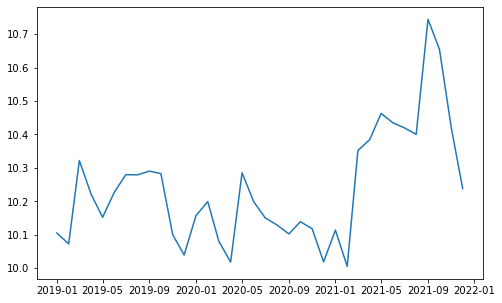

In [254]:
d_log = np.log(d)
plt.plot(d_log)

In [255]:
def do_station(timeseries):
    rolling_mean = d.rolling(window = 12).mean()
    rolling_std = d.rolling(window = 12).std()
    
    
    original = plt.plot( d, color = 'blue', label = 'Original')
    mean = plt.plot( rolling_mean, color = 'red', label = 'Rolling mean')
    std = plt.plot( rolling_std, color = 'black', label = 'Rolling std')
    plt.legend(loc = 'best')
    plt.title('Rolling mean vs Standard Deviation')
    plt.show(block=False)

    result = adfuller(d['total_users'])

    print('ADF Statistics: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical value:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key,value))
    

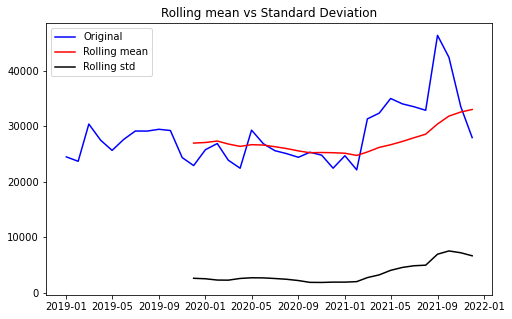

ADF Statistics: -2.4449231466628008
p-value: 0.12945638748215488
Critical value:
	1%: -3.6327426647230316
	5%: -2.9485102040816327
	10%: -2.6130173469387756


In [256]:
rolling_mean = d_log.rolling(window=12).mean()
d_log_minus_mean = d_log - rolling_mean
d_log_minus_mean.dropna(inplace=True)

do_station(d_log_minus_mean)

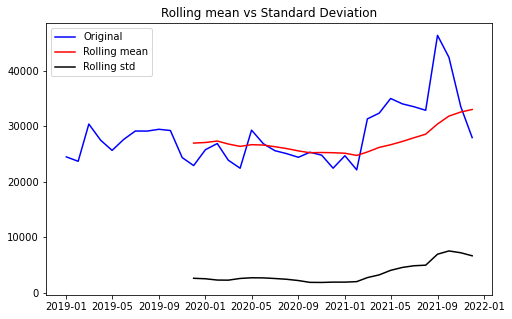

ADF Statistics: -2.4449231466628008
p-value: 0.12945638748215488
Critical value:
	1%: -3.6327426647230316
	5%: -2.9485102040816327
	10%: -2.6130173469387756


In [172]:
rolling_mean_exp_decay = d_log.ewm(halflife =12, min_periods=0, adjust = True).mean()
d_log_exp_decay = d_log - rolling_mean_exp_decay
d_log_exp_decay.dropna(inplace = True)

do_station(d_log_exp_decay)

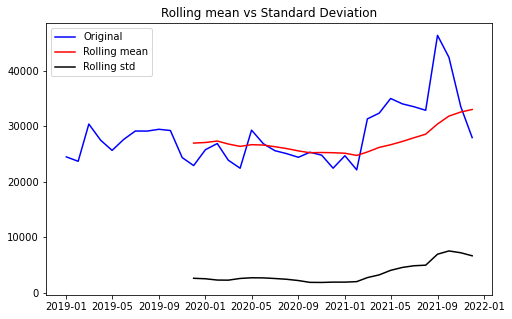

ADF Statistics: -2.4449231466628008
p-value: 0.12945638748215488
Critical value:
	1%: -3.6327426647230316
	5%: -2.9485102040816327
	10%: -2.6130173469387756


In [173]:
d_log_shift = d_log - d_log.shift()
d_log_shift.dropna(inplace=True)

do_station(d_log_shift)

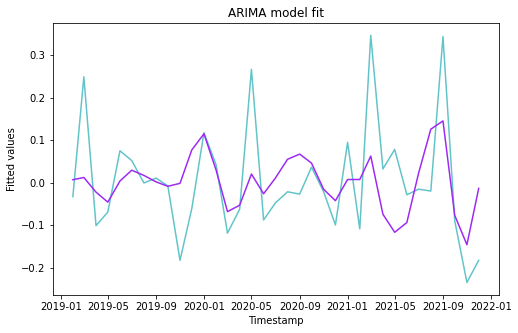

In [286]:
decompositon = seasonal_decompose(d_log)
model = ARIMA(d_log, order =(2,1,2))
results = model.fit()
plt.plot(d_log_shift,  label = 'recorded',color = '#61C4C9')
plt.title('ARIMA model fit')
plt.xlabel('Timestamp')
plt.ylabel('Fitted values')
plt.plot(results.fittedvalues, color = '#9D29F3', label = 'prediction')

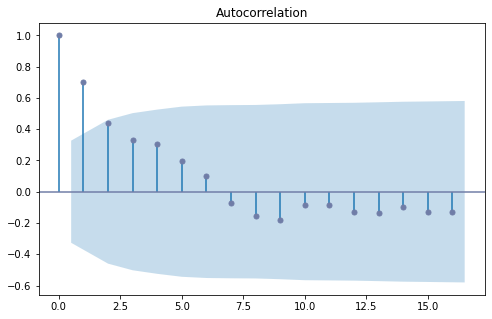

In [193]:
from statsmodels.graphics.tsaplots import plot_acf
d_2 = pd.read_csv('values_month_year.csv', header = 0, index_col = 0)
plot_acf(d_2, color = '#707DA7')
plt.show()

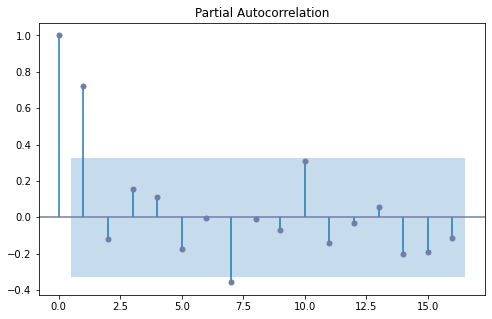

In [194]:
from statsmodels.graphics.tsaplots import plot_pacf
d_3 = pd.read_csv('values_month_year.csv', header = 0, index_col = 0)
plot_pacf(d_3, color = '#707DA7')
plt.show()

Text(0, 0.5, 'Use Count')

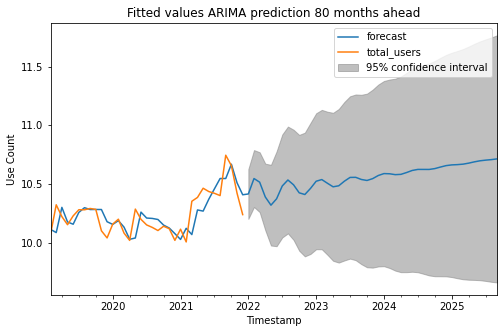

In [288]:
pred = results.plot_predict(1,80)
plt.title('Fitted values ARIMA prediction 80 months ahead')
plt.xlabel('Timestamp')
plt.ylabel('Use Count')

In [212]:
train = d[d.index < pd.to_datetime("2021-01-01", format='%Y-%m-%d')]
test = d[d.index > pd.to_datetime("2021-01-01", format='%Y-%m-%d')]

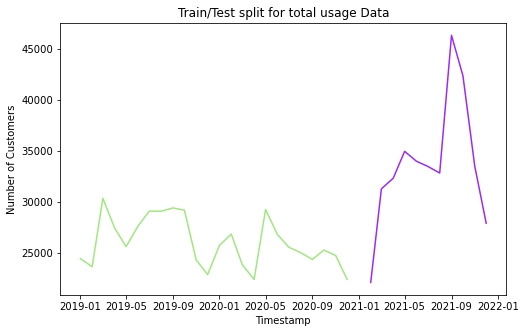

In [290]:
plt.plot(train, color = "#A0E780")
plt.plot(test, color = "#9D29F3")
#plt.plot('ro', linestyle = 'None')
#plt.plot(marker='o')
plt.ylabel('Number of Customers')
plt.xlabel('Timestamp')
#plt.xticks(rotation=45)
plt.title("Train/Test split for total usage Data")
plt.show()

In [214]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [215]:
y = train['total_users']

In [226]:
ARMAmodel = SARIMAX(y, order = (2,1,2))

In [227]:
ARMAmodel = ARMAmodel.fit()

In [228]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.5) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

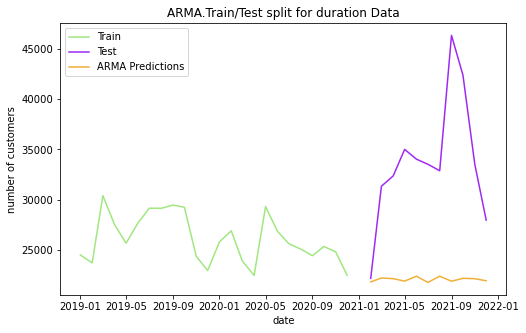

In [298]:
plt.plot(train, color = "#A0E780", label = 'Train')
plt.plot(test, color = "#9D29F3", label = 'Test')
#plt.plot('ro', linestyle = 'None')
#plt.plot(marker='o')
plt.ylabel('number of customers')
plt.xlabel('date')
#plt.xticks(rotation=45)
plt.title("ARMA.Train/Test split for duration Data")
#plt.plot(y_pred_out, color='green', label = 'Predictions')
#plt.legend()
plt.plot(y_pred_out_2, color='#F0AF36', label = 'ARMA Predictions')
plt.legend()
plt.show()

In [297]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test['total_users'].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  13228.017924841242


In [300]:
from statsmodels.tsa.arima.model import ARIMA


RMSE:  13228.017924841242


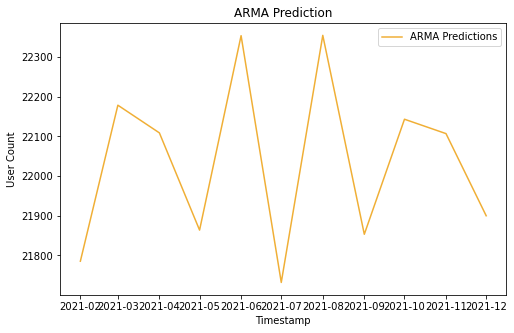

In [302]:
ARIMAmodel = ARIMA(y, order = (2, 1, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.5) 
y_pred_df['Predictions'] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out_2 = y_pred_df['Predictions'] 
plt.plot(y_pred_out, color='#F0AF36', label = 'ARMA Predictions')
plt.title('ARMA Prediction')
plt.xlabel('Timestamp')
plt.ylabel('User Count')
plt.legend()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test['total_users'].values, y_pred_df['Predictions']))
print("RMSE: ",arma_rmse)